<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_03_%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.03. 막대그래프

---
* 날짜: 2022-04-18
* 이름: 박태현

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()
```

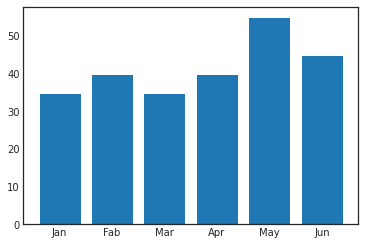

In [ ]:
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()

#### **| 옵션**

```
plt.bar(xs, nums, 
        color = '색깔'
        edgecolor='테두리색'
        width/ height=바의 너비/높이
        linewidth=테두리두께
        align=눈금위치('center'/'edge'), 
        tick_label=[])
```

#### **| 수평 막대그래프**


```
plt.barh(xs, nums)
```

<BarContainer object of 6 artists>

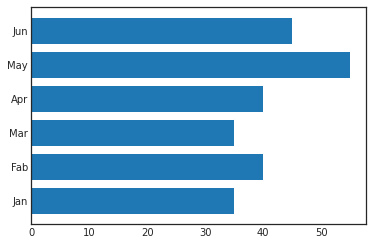

In [ ]:
plt.barh(xs, nums)

### (2) Seaborn 으로 그리기




#### **| 기본사용**

```
sns.barplot(x=xs, y=nums)
```

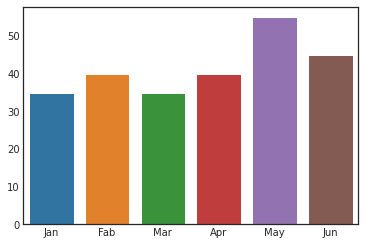

In [ ]:
sns.barplot(x=xs, y=nums)

#### **| 옵션**

```
seaborn.barplot(x=None, y=None, 
                color=None, 
                palette=None, # 컬러맵
                saturation=0.75, # 밝기
                )
```

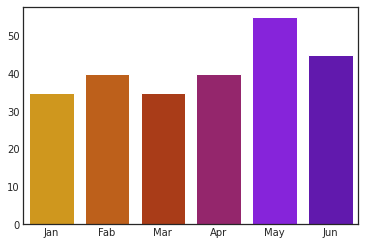

In [ ]:
sns.barplot(x=xs, y=nums,
                # color=None, 
                palette='gnuplot_r', # 컬러맵
                saturation=0.75, # 밝기
                )

#### **| 수평 막대그래프**


```
sns.barplot(x=nums, y=xs)
```

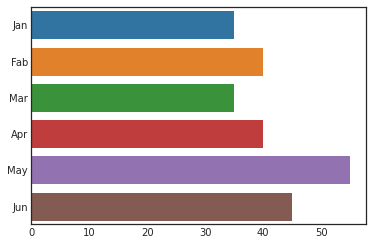

In [ ]:
sns.barplot(x=nums, y=xs)

#### **| DataFrame 사용**



* 데이터 프레임을 만들어 줍니다.



In [ ]:
df = pd.DataFrame([xs,nums]).T
df.columns = ['Month','Count']
df

,Month,Count
0,Jan,35
1,Fab,40
2,Mar,35
3,Apr,40
4,May,55
5,Jun,45


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.bar(x=x,y=y)
```




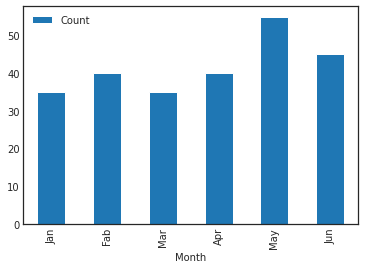

In [ ]:
df.plot.bar(x='Month',y='Count')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.barplot(data=df,x=x, y=y)
```


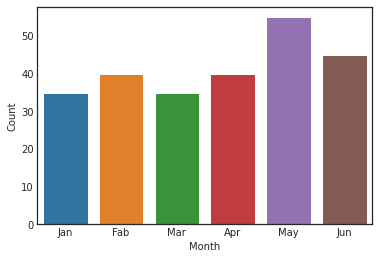

In [ ]:
sns.barplot(data=df,x='Month',y='Count')


## **실습**


---




### (1) 과일 데이터 시각화


```
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
```

In [ ]:
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)

fresh , qual, price, sale

(array([7, 4, 8]),
 array([5, 7, 3]),
 array([1214, 1330, 1458]),
 array([ 787, 1072,  799]))

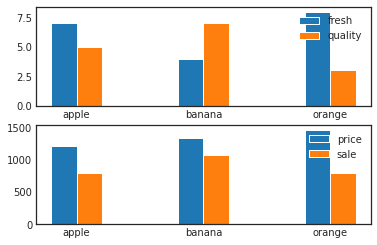

In [ ]:
idx = np.arange(3)
width = 0.2


plt.subplot(2,1,1)
plt.bar(idx, fresh, label = 'fresh', width = width)
plt.bar(idx + width, qual, label = 'quality', width = width)
plt.xticks(idx + width / 2, fruits)
plt.legend()

plt.subplot(2,1,2)
plt.bar(idx, price, label = 'price', width = width)
plt.bar(idx + width, sale, label = 'sale', width = width)
plt.xticks(idx + width / 2, fruits)
plt.legend()

### (2) **kwargs 이용한 옵션적용




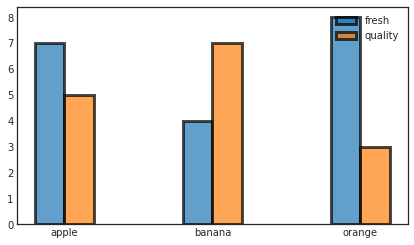

In [ ]:
plt.figure(figsize = (7,4))

style = dict(width = width, 
        alpha = 0.7,
        linewidth = 3,
        edgecolor = 'k')

plt.bar(idx, fresh, label = 'fresh',**style )
plt.bar(idx + width, qual, label = 'quality', **style)
plt.xticks(idx + width / 2, fruits)
plt.legend()


## 과제


### (1) 막대그래프를 이용한 flight 데이터 시각화

```
df=sns.load_dataset('flights')
```

 `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러온 후 아래와 같은 플롯을 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0203-01.png?raw=true)





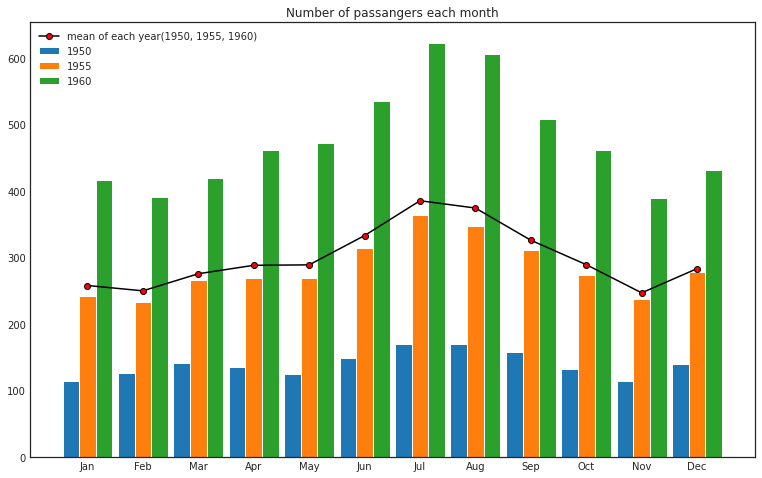

In [ ]:
df=sns.load_dataset('flights')
idx = np.arange(12)
width = 0.3
style = dict(width = width, 
             )

plt.figure(figsize = (13,8))

df01 = df[(df['year']==1950)]
df02 = df[(df['year']==1955)]
df03 = df[(df['year']==1960)]
df04 = df[(df['year']==1950) | (df['year']==1955) | (df['year']==1960)]

df1950 = df01['passengers'].groupby(df01['month']).sum()
df1955 = df02['passengers'].groupby(df02['month']).sum()
df1960 = df03['passengers'].groupby(df03['month']).sum()
df_mean = df04['passengers'].groupby(df04['month']).mean()


plt.bar(idx, df1950,label = '1950' ,**style)
plt.bar(idx + width, df1955,label = '1955', **style)
plt.bar(idx + width + width, df1960, label = '1960', **style) # 굳이 그룹바이로 묶지 않아도 됨

plt.plot(idx + width, df_mean,marker = 'o',
         color = 'k', 
         markerfacecolor='r',
         label = 'mean of each year(1950, 1955, 1960)')

plt.xticks(idx + width, df['month'])
plt.title('Number of passangers each month')

plt.legend(loc = 'upper left')

*해설*

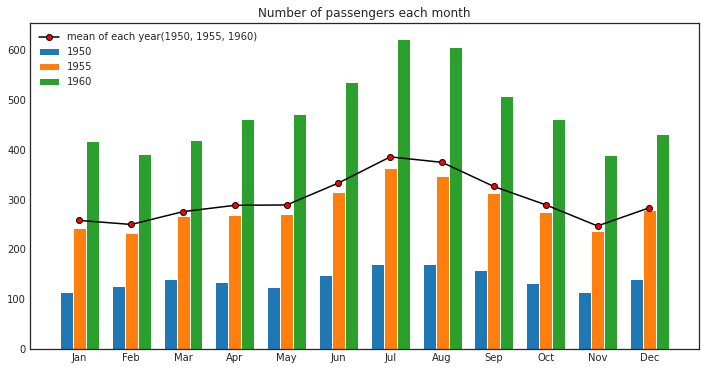

In [ ]:
df = sns.load_dataset('flights')
df1 = df[df.year==1950]
df2 = df[df.year==1955]
df3 = df[df.year==1960]
df1

# 3년간 평균
x_mean = np.mean(np.array([df1.passengers, df2.passengers, df3.passengers]), axis=0) # axis = 0 은 월별로 하기 위해 
width = 0.25
idx = np.arange(12)

plt.figure(figsize=(12,6))
# 막대그래프 작성
plt.bar(idx-width, df1.passengers , width=width, label='1950')
plt.bar(idx, df2.passengers , width=width, label='1955')
plt.bar(idx+width, df3.passengers , width=width, label='1960')
# 선그래프 작성
plt.plot(x_mean, marker='o', color='k', markerfacecolor='r', label='mean of each year(1950, 1955, 1960)')

# 기타 세팅
plt.xticks(idx, df1.month)
plt.legend(loc='upper left')
plt.title('Number of passengers each month')

plt.show()